In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import math

In [2]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [3]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [4]:
def polynomial_features_generation(data=None, degree=0):
    return np.hstack((data,np.power(data,np.arange(start=2,stop=degree+1))))

In [5]:
def standardization(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        data[:,i] = np.divide(np.subtract(data[:,i],np.mean(data[:,i])), np.std(data[:,i])).astype(float)
    return data

In [6]:
def min_max_scaling(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        min_ = np.min(data[:,i])
        max_ = np.max(data[:,i])
        max_minus_min = max_ - min_
        data[:,i] = np.divide(np.subtract(data[:,i],min_),max_minus_min)
    return data

In [7]:
def normalize(feature_matrix=None):
    norms = np.sqrt(np.sum(np.square(feature_matrix),axis=0))
    normalized_features = feature_matrix/norms
    return (normalized_features,norms)

In [8]:
def root_mean_squared_error(y=None,y_bar=None,no_of_observations=0):
    return np.sqrt(np.divide(np.sum(np.square(np.subtract(y,y_bar))),no_of_observations))

In [9]:
def gradient_descent(x=None,y=None,tolerance_gradient=0.01, tolerance_cost=0.0000001,
                     alpha = 0.001, max_iter=10000,l2_regularization=0):
   
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    partials = np.zeros(x.shape[1]+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = []
    gradients = []
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, y)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        #This is the total change :p
#         step_size = np.multiply(alpha,partials)
#         weights_regularized = np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization)))
        
        weights = np.subtract(np.vstack((weights[0],np.multiply(weights[1:],1-2*alpha*l2_regularization))),
                              np.multiply(alpha,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
#         gradients = np.append(gradients,gradient_magnitude)
#         costs = np.append(costs,cur_cost)
        gradients.append(gradient_magnitude)
        costs.append(cur_cost)

#         if i%1000==0:
#             print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('[Gradient Magnitude - Tolerance] Satisfied')
            else:
                print('[Cost Tolerance - Precision] Satisfied')
            converged = True

        if i >= max_iter:
            print('Iterations Completed')
            converged = True
        
        prev_cost = cur_cost
    return (i, np.array(weights),np.array(gradients), costs)

In [34]:
def coordinate_descent(x=None,y=None, tolerance_step=0.0000001, 
                       max_iter=10000,l1_regularization=0):
#     print('start')
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    iteration = 0
    max_step = 10
    upper_limit = np.multiply(np.divide(l1_regularization,2),-1)
    lower_limit = np.divide(l1_regularization,2)
    
    converged = False
#     print('entering loop')
    while not converged:
        iteration += 1
#         print('entering inner loop',iteration)
        for j in range(0,x.shape[1]-1):
            w_j_old = weights[j]
            predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
            
            predicted_no_j = predicted - np.multiply(feature_matrix[:,j],weights[j])
            errors = np.subtract(predicted_no_j, y)
            
            roo = np.sum(np.multiply(feature_matrix[:,j],errors))
            
            if j==0:
                weights[j] = roo
            elif roo < lower_limit:
                weights[j] = roo + upper_limit
            elif roo > upper_limit:
                weights[j] = roo - upper_limit
            else:
                weights[j] = 0
                
            step = abs(w_j_old - weights[j])
            if(step>max_step):
                max_step = step
            
        
        if (max_step < tolerance_step):
            print('Step Tolerance - Satisfied')
            converged = True

        if iteration >= max_iter:
            print('Iterations Completed')
            converged = True

    return (iteration, np.array(weights))
            

In [125]:
house_data = pd.read_csv('Related Datasets/kc_house_data.csv')
house_test_data = pd.read_csv('Related Datasets/kc_house_test_data.csv')
house_train_data = pd.read_csv('Related Datasets/kc_house_train_data.csv')

In [126]:
df = house_train_data[['sqft_living','bedrooms','price']]

In [127]:
mean_ = np.mean(df['sqft_living'])
std_ = np.std(df['sqft_living'])
m = 3
df = df[abs(df['sqft_living'] - mean_ ) < (m*std_)]

In [128]:
data = np.array(df[['sqft_living','bedrooms']])
data = data[:1000,:]
target = np.array(df[['price']])
target = target[:1000,:]

In [129]:
data_normalized = normalize(data)

In [130]:
start_time = time.time()
i,weights = coordinate_descent(x=data_normalized[0], y=target,tolerance_step=1,
                                max_iter=10000,l1_regularization=1e7)
end_time = time.time()

Iterations Completed


In [131]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
np.set_printoptions(precision=10)
print('Calculated weights:\n',weights)

Time taken:  57.44074034690857
Iterations:  10000
Calculated weights:
 [[-5.0769737853e+11]
 [ 2.9660045123e-01]
 [ 9.0719081209e-01]]


In [132]:
result = abs(weights[0]) + weights[1]*data_normalized[0][:,0] + weights[2]*data_normalized[0][:,1]
# type(result)
# print(result,"")

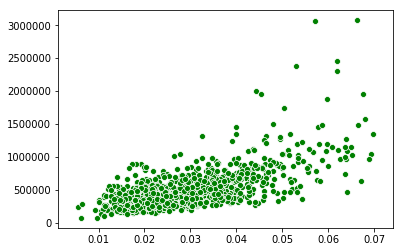

In [133]:
sns.scatterplot(x=data_normalized[0][:,0],y=target.reshape(1000),color='g')

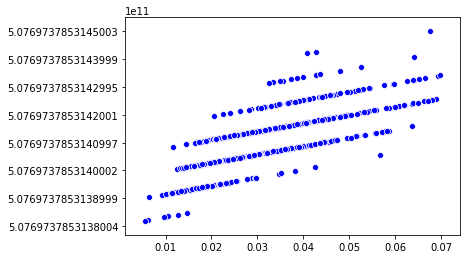

In [134]:
plt.ticklabel_format(useOffset=False)
sns.scatterplot(x=data_normalized[0][:,0],y=result,color='b')

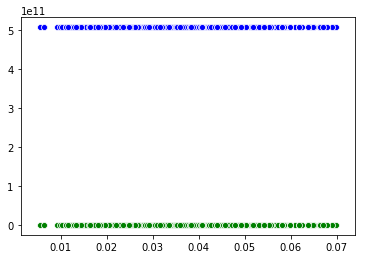

In [135]:
plt.ticklabel_format(useOffset=False)
sns.scatterplot(x=data_normalized[0][:,0],y=target.reshape(1000),color='g')
sns.scatterplot(x=data_normalized[0][:,0],y=result,color='b')

In [19]:
# #saving for later insertion
#             feature_j = feature_matrix[:,j]
#             weight_j = weights[j]
            
#             #deleting from matrix for performing operation on matrix
#             feature_matrix = np.delete(feature_matrix,j,1)
#             weights = np.delete(weights,j,0)
            
#             #performing operations
#             predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
            
#             #Inserting values back in matrices
#             feature_matrix = np.insert(feature_matrix,j,feature_j,1)
#             weights = np.insert(weights,j,weight_j,0)
            
#             #calculating errors
#             errors = np.subtract(predicted, y)
            
#             roo_j = np.dot(feature_matrix.T,errors)
#             weights[j] = roo_j

In [20]:
# data_types = dtype_dict = {'bathrooms':float, 'waterfront':int, 
#                            'sqft_above':int, 'sqft_living15':float, 
#                            'grade':int, 'yr_renovated':int, 'price':float, 
#                            'bedrooms':float, 'zipcode':str, 'long':float, 
#                            'sqft_lot15':float, 'sqft_living':float, 
#                            'floors':str, 'condition':int, 'lat':float, 
#                            'date':str, 'sqft_basement':int, 'yr_built':int, 
#                            'id':str, 'sqft_lot':int, 'view':int}
# data= pd.read_csv('Related Datasets/kc_house_train_data.csv',dtype=data_types)